<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-7/Classification_Tree_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config
set_config("display.max_columns", 100)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [87]:
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/cancer.csv"
df = pd.read_csv(fpath)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Set X & y

In [88]:
X = df.drop(columns="diagnosis").copy()
y = df["diagnosis"].copy()

# How many Classification choices?

In [89]:
#Percentage of choices
from sklearn.preprocessing import normalize
df["diagnosis"].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

#Convert Diagnosis Values to Numeric

In [90]:
df["diagnosis"].replace({"M":1, "B":0}, inplace=True)

# Train Test Split

In [91]:
#splitting train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,8913,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
512,915691,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090
402,904689,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
446,9110732,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,...,21.53,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075
210,881046502,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,...,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865


#Models

## Function for Accuracy

In [92]:
def evaluate_classification(model, X_train, X_test, y_train, y_test):
    """Uses model.score to display the R^2 values for training and test splits"""
    print(f"Training Accuracy: {model.score(X_train, y_train):,.3f}")
    print(f"Testing Accuracy: {model.score(X_test, y_test):,.3f}")

## Decision Tree

In [93]:
#Instatiating Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
#Fit training data
tree_clf.fit(X_train, y_train)
evaluate_classification(tree_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 1.000
Testing Accuracy: 0.951


##Bagged Tree

In [94]:
#Instatiating Bagged Tree Classifier
bag_clf = BaggingClassifier(random_state=42)
#Fit on Training Data
bag_clf.fit(X_train, y_train)
evaluate_classification(bag_clf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.993
Testing Accuracy: 0.951


##Random Forest Classifier

In [95]:
#Instantiate RFC
rfc = RandomForestClassifier(random_state=42)
#Fit model to training data
rfc.fit(X_train, y_train)
evaluate_classification(rfc, X_train,X_test, y_train, y_test)

Training Accuracy: 1.000
Testing Accuracy: 0.972


The best model to use is Random Forest Classifier. So, we will plot this model in our Confusion Matrix.

#Create Confusion Matrix

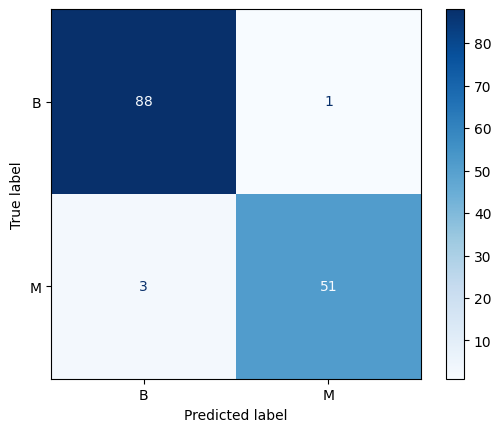

In [96]:
##.from_estimator is an evaluation of the AI decision based on its training
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap="Blues");

1. What was the accuracy of the model? (You should have already determined this for the classification tree exercise)
    * (88+51) / (88+51+3+1) = .97202797202

Create the confusion matrix to answer the following questions:


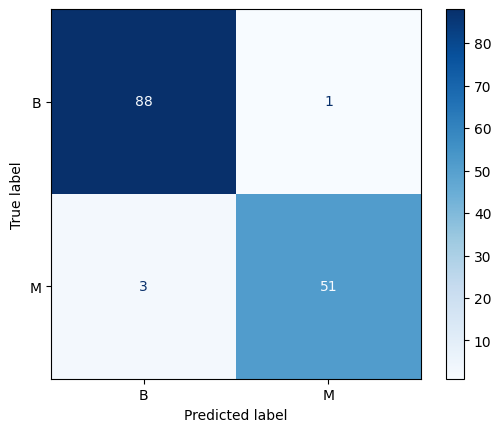

In [98]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test,y_test, cmap="Blues");

2. Which condition (Malignant or Benign) is considered the positive class in this data set?
    * Malignant, its what we are trying to predict. 
3. How many false positives were there?
    * 1
4. How many false negatives were there?
    * 3
5. For the breast cancer data set, which do you think is more problematic: false positives or false negatives? Explain.
    * I would think False Negatives (predict they didnt have cancer when they actually do) would be more problematic because they could be start treatment for breast cancer sooner.